In [41]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
ao = np.loadtxt('play.txt')

In [43]:
ao[0:2]

array([[  1.95000000e+03,   1.00000000e+00,  -6.03100000e-02],
       [  1.95000000e+03,   2.00000000e+00,   6.26810000e-01]])

In [44]:
ao.shape

(807, 3)

In [45]:
dates = pd.date_range('1950-01', '2017-04', freq='M')

In [46]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31'],
              dtype='datetime64[ns]', length=807, freq='M')

In [47]:
dates.shape

(807,)

In [48]:
AO = Series(ao[:,2], index=dates)

In [49]:
AO.head(5)

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
Freq: M, dtype: float64

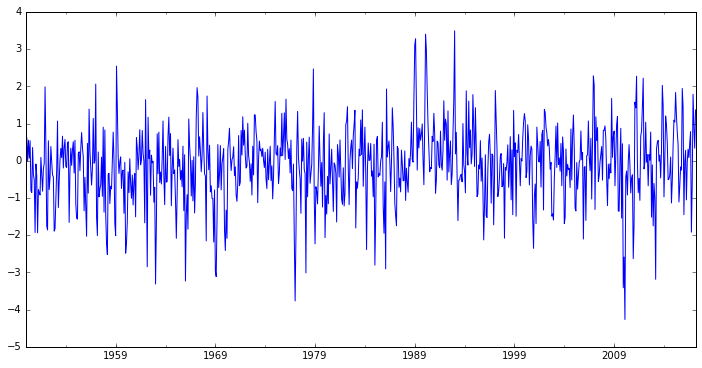

In [50]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
AO.plot()

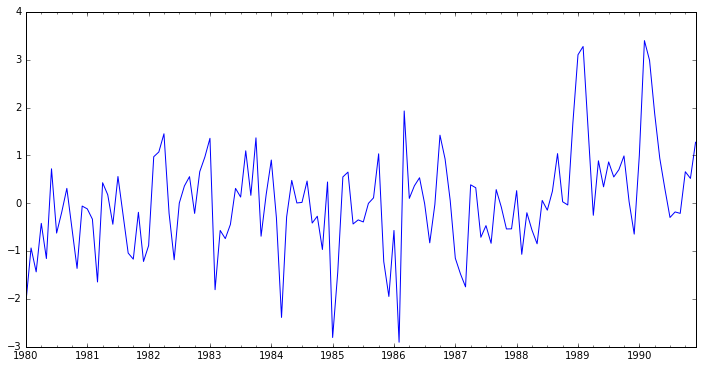

In [51]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
AO['1980':'1990'].plot()

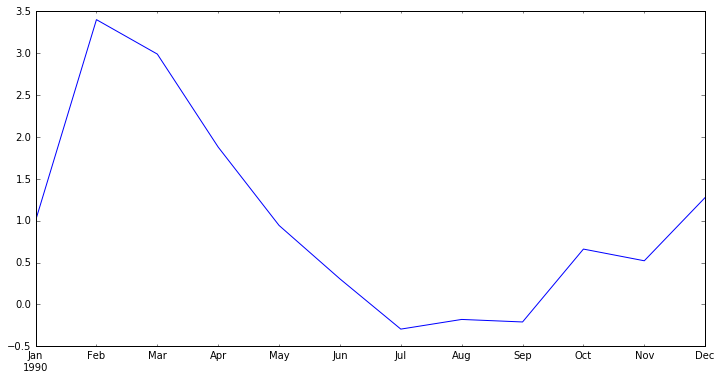

In [52]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
AO['1990-01':'1990-12'].plot()

In [53]:
AO['2011']

2011-01-31   -1.683100
2011-02-28    1.575400
2011-03-31    1.424100
2011-04-30    2.274800
2011-05-31   -0.035093
2011-06-30   -0.857750
2011-07-31   -0.471620
2011-08-31   -1.062600
2011-09-30    0.664740
2011-10-31    0.799750
2011-11-30    1.459200
2011-12-31    2.220800
Freq: M, dtype: float64

In [54]:
nao = np.loadtxt('play1.txt')
dates_nao = pd.date_range('1950-01', '2017-04', freq='M')
NAO = Series(nao[:,2], index=dates_nao)

In [55]:
AO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31'],
              dtype='datetime64[ns]', length=807, freq='M')

In [56]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

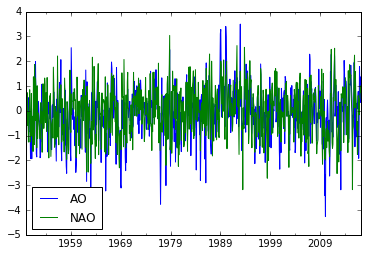

In [57]:
aonao.plot()

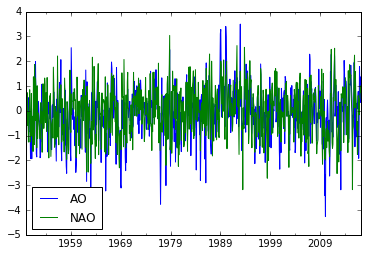

In [58]:
plt.figure(figsize=(12, 6), dpi=80)
aonao.plot()

In [59]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


In [60]:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


In [63]:
#stat kicks in
del aonao['Diff']
aonao.mean()

AO    -0.112995
NAO   -0.015898
dtype: float64

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


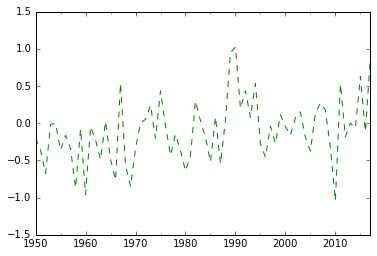

In [67]:
AO_mm = AO.resample("A")

AO_mm.plot(style='g--')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  if __name__ == '__main__':


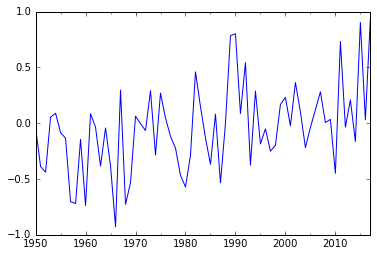

In [69]:
AO_mm = AO.resample("A", how='median')
AO_mm.plot()


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


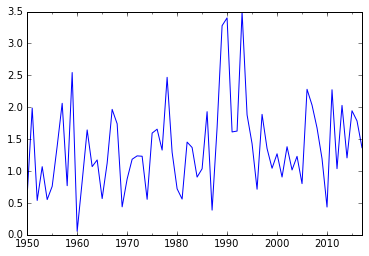

In [70]:
AO_mm = AO.resample("A", how=np.max)
AO_mm.plot()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


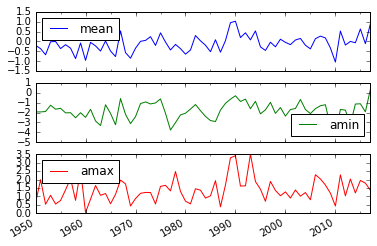

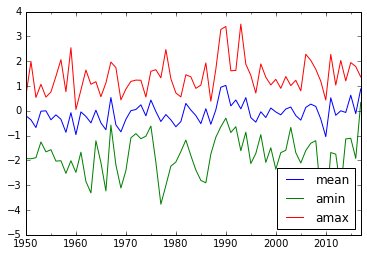

In [72]:
AO_mm = AO.resample("A", how=['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=12).mean()
  if __name__ == '__main__':


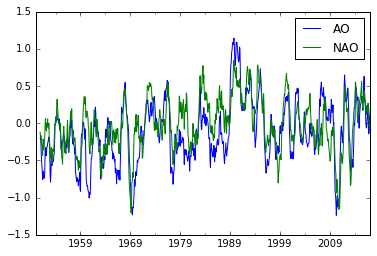

In [74]:
pd.rolling_mean(aonao, window=12).plot()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120).corr(other=<Series>)
  if __name__ == '__main__':


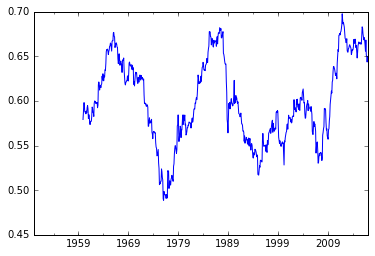

In [75]:
pd.rolling_corr(aonao.AO, aonao.NAO, window=120).plot()

In [76]:
aonao.corr()

,AO,NAO
AO,1.000000,0.605772
NAO,0.605772,1.000000
